In [118]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import Imputer
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from scipy import stats
import math
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')





In [119]:
df = pd.read_csv(r"C:\Users\Jason Liu\Downloads\Motor_Vehicle_Collisions_-_Crashes.csv")
number_features = ["NUMBER OF PERSONS INJURED","NUMTIME"]

def replace_missing_value(df, number_features):

    imputer = Imputer(strategy="median")
    df_num = df[number_features]
    imputer.fit(df_num)
    X = imputer.transform(df_num)
    res_def = pd.DataFrame(X, columns=df_num.columns)
    return res_def

df["NUMBER OF PERSONS INJURED"] = replace_missing_value(df,["NUMBER OF PERSONS INJURED"])
df["NUMTIME"] = replace_missing_value(df,["NUMTIME"])

C:\Users\Jason Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jason Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [120]:

feature_col = ['NUMTIME']
X = df[feature_col]
y = df["NUMBER OF PERSONS INJURED"]


linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print("The y intercept:", linreg.intercept_)
print("The single coefficient:", list(zip(feature_col,linreg.coef_)))

# evaluate R^2
y_pred = linreg.predict(X)
print("R^2: ", metrics.r2_score(y, y_pred))

# Evaluate MSE
print("MSE: ", metrics.mean_squared_error(y, y_pred))


The y intercept: 0.24012208946105693
The single coefficient: [('NUMTIME', 0.002093888797908913)]
R^2:  0.0003258452364977016
MSE:  0.4359236094099921


In [122]:

X_mult = df[feature_col]
y_mult = df["NUMBER OF PERSONS INJURED"]

mult_logreg = LogisticRegression()
mult_logreg.fit(X_mult, y_mult)
y_mult_pred = mult_logreg.predict(X_mult)
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y_mult, test_size=0.3, random_state=1)
print("training data size:",X_mult_train.shape)
print("testing data size:",X_mult_test.shape)
#train on training set
mult_logreg2 = LogisticRegression()
mult_logreg2.fit(X_mult_train, y_mult_train)

#generate predictions on training set and evaluate
y_mult_pred_train = mult_logreg2.predict(X_mult_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_train, y_mult_pred_train)))

#generate predictions on test set and evaluate
y_mult_pred_test = mult_logreg2.predict(X_mult_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test, y_mult_pred_test)))
print("MAE for data:",metrics.mean_absolute_error(y_mult_test, y_mult_pred_test))
print("MSE for data:",metrics.mean_squared_error(y_mult_test, y_mult_pred_test))
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test, y_mult_pred_test)))

print(mult_logreg2.coef_)

C:\Users\Jason Liu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jason Liu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


training data size: (734002, 1)
testing data size: (314573, 1)


C:\Users\Jason Liu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jason Liu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training set RMSE: 0.7132150627119576
Test set RMSE: 0.7121163089753125
MAE for data: 0.2693269924627988
MSE for data: 0.5071096375086228
Test set RMSE: 0.7121163089753125
[[-0.00974372]
 [ 0.0099965 ]
 [ 0.0023065 ]
 [ 0.00921442]
 [ 0.01742065]
 [ 0.02245258]
 [ 0.02926849]
 [-0.00888512]
 [-0.04316835]
 [-0.05565474]
 [-0.07320324]
 [-0.16261973]
 [-0.11246251]
 [-0.32610472]
 [-0.42392402]
 [-0.25637934]
 [-0.39326114]
 [-0.44841942]
 [-0.36685577]
 [-0.32014083]
 [-0.40121895]
 [-0.66441188]
 [-0.53378161]
 [-0.44953194]]


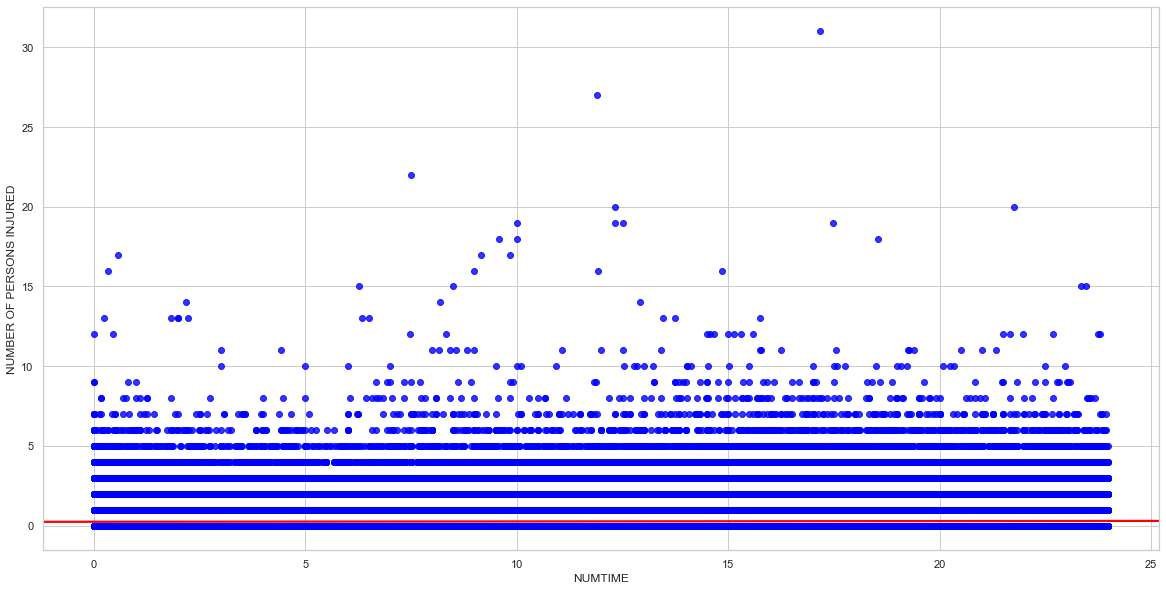

In [123]:
sns.set(rc={'figure.figsize':(20,10)},font_scale=1,style='whitegrid')

plot = sns.regplot(x=df['NUMTIME'], y= df['NUMBER OF PERSONS INJURED'], data=df, ci = None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})